In [135]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import os
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

subprocess.call("adb shell dumpsys gfxinfo mobisocial.arcade reset", shell = True)
subprocess.call("adb shell input swipe 700 1500 700 200 1000", shell = True)

info_columns_name = ['Flags', 'IntendedVsync', 'Vsync', 'OldestInputEvent', 'NewestInputEvent', 
                     'HandleInputStart', 'AnimationStart', 'PerformTraversalsStart', 'DrawStart', 
                     'SyncQueued', 'SyncStart', 'IssueDrawCommandsStart', 'SwapBuffers', 'FrameCompleted']
result_columns_name = ['UI Thread 工作使卡頓','>2 表示處理 input 時間長','動畫時間','佈局測量時間','調用 draw() 時間',
                    '> 0.4 表示畫了大量需傳至 GPU 的新視圖','GPU 工作量','處理總時間','標準線']

info_data = os.popen("adb shell dumpsys gfxinfo mobisocial.arcade framestats | grep -A 120 'Flags'").read().splitlines()
info_data.pop(0)

info_df = pd.DataFrame(columns = info_columns_name)
result_df = pd.DataFrame(columns = result_columns_name)

i = 0
for line in info_data:
    eachline = line.split(',')
    eachline = list(filter(None, eachline))
    if (len(eachline) == len(info_columns_name)) :
        series = pd.Series(eachline, dtype = "int", index = info_columns_name)
        info_df.loc[i] = series 
        i += 1
    
info_df.head()

,Flags,IntendedVsync,Vsync,OldestInputEvent,NewestInputEvent,HandleInputStart,AnimationStart,PerformTraversalsStart,DrawStart,SyncQueued,SyncStart,IssueDrawCommandsStart,SwapBuffers,FrameCompleted
0,0,886345873773908,886345873773908,886345860000000,886345868000000,886345874213845,886345882155692,886345882633769,886345882744385,886345884267154,886345884341385,886345884909308,886345889317001,886345894255847
1,0,886345906991026,886345906991026,886345895000000,886345901991026,886345908597618,886345909977156,886345910144618,886345910240849,886345910413003,886345913602311,886345914023234,886345922178542,886345928649928
2,0,886345940208144,886345940208144,886345929000000,886345935208144,886345940985390,886345942261929,886345942419929,886345942506314,886345942654006,886345942819237,886345943211237,886345956416238,886345960978854
3,0,886345973425262,886345973425262,886345961000000,886345968425262,886345975027471,886345985188856,886345985347087,886345985444549,886345985586549,886345985653318,886345986282241,886345989448703,886345994304857
4,0,886346006642380,886346006642380,886345995000000,886346001642380,886346008175474,886346011290167,886346014953398,886346015106321,886346015275475,886346016313167,886346016661859,886346019795398,886346022358168


In [136]:
result_df['UI Thread 工作使卡頓'] = info_df['Vsync'] - info_df['IntendedVsync']
result_df['>2 表示處理 input 時間長'] = (info_df['AnimationStart'] - info_df['HandleInputStart'])/1000000
result_df['動畫時間'] = (info_df['PerformTraversalsStart'] - info_df['AnimationStart'])/1000000
result_df['佈局測量時間'] = (info_df['DrawStart'] - info_df['AnimationStart'])/1000000
result_df['調用 draw() 時間'] = (info_df['SyncStart'] - info_df['DrawStart'])/1000000
result_df['> 0.4 表示畫了大量需傳至 GPU 的新視圖'] = (info_df['IssueDrawCommandsStart'] - info_df['SyncStart'])/1000000
result_df['GPU 工作量'] = (info_df['IssueDrawCommandsStart'] - info_df['SyncStart'])/1000000
result_df['處理總時間'] = (info_df['FrameCompleted'] - info_df['IntendedVsync'])/1000000
result_df['標準線'] = 16
result_df.head()

,UI Thread 工作使卡頓,>2 表示處理 input 時間長,動畫時間,佈局測量時間,調用 draw() 時間,> 0.4 表示畫了大量需傳至 GPU 的新視圖,GPU 工作量,處理總時間,標準線
0,0,7.94185,0.478077,0.588693,1.597,0.567923,0.567923,20.4819,16
1,0,1.37954,0.167462,0.263693,3.36146,0.420923,0.420923,21.6589,16
2,0,1.27654,0.158,0.244385,0.312923,0.392,0.392,20.7707,16
3,0,10.1614,0.158231,0.255693,0.208769,0.628923,0.628923,20.8796,16
4,0,3.11469,3.66323,3.81615,1.20685,0.348692,0.348692,15.7158,16


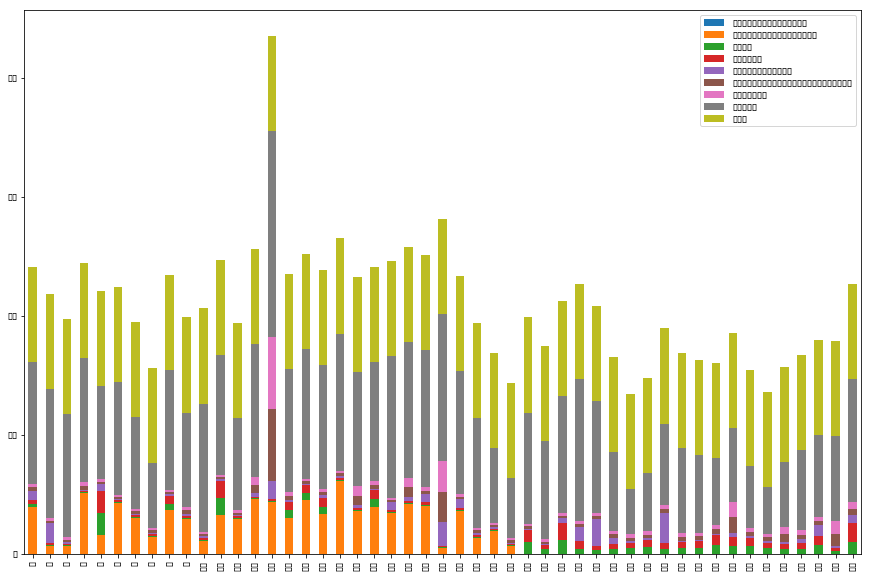

In [137]:
result_plt = result_df.plot(kind = 'bar', figsize = (15,10), stacked = True)
result_plt
# plt.plot(x,y1,color='red')

In [117]:
import matplotlib
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
 
for i in a:
    print (i)

.Keyboard
.LastResort
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Text Condensed
.SF NS Text Condensed
.SF NS Text Condensed
.SF NS Text Condensed
.SF NS Text Condensed
.SF NS Text Condensed
Adobe Arabic
Adobe Arabic
Adobe Arabic
Adobe Arabic
Adobe

In [103]:
import time
import sys
import os
import openpyxl
from openpyxl import Workbook
from openpyxl.styles.colors import Color
from openpyxl.chart import LineChart, Reference, Series

from copy import deepcopy

titlelist = [' UI 线程中发生的工作使其无法及时响应垂直同步信号','应用处理输入事件所花的时间（ >2 毫秒表示处理输入事件时间长）',
                '正在运行的所有动画（ObjectAnimator、ViewPropertyAnimator 和通用转换）所需的时间',
                '完成布局和测量阶段所需的时间','对树中的所有视图调用 View.draw() 所需的时间',
                '约 > 0.4 毫秒表示绘制了大量必须上传到 GPU 的新位图','GPU 工作量','处理此帧所花的总时间','达标线']
subtitlelist = ['IntendedVsync','HandleInputStart','AnimationStart','PerformTraversalsStart',
                'DrawStart','SyncStart','IssueDrawCommandsStart','FrameCompleted','Avg']

# 輸出資料表名稱
titlename = "Feed"
print ("Starting")

# 統計圖資料表名稱
statname = "Stats"
statwb = Workbook()
statws = statwb.active
statws.title = "statistic"
statws.column_dimensions["A"].width = 12
statws.column_dimensions["B"].width = 12
statws.column_dimensions["C"].width = 12
statws.column_dimensions["D"].width = 12
statws.column_dimensions["E"].width = 12
statws.column_dimensions["F"].width = 12
statws.column_dimensions["G"].width = 12
statws.column_dimensions["H"].width = 12
statws.column_dimensions["I"].width = 12


# 執行 3 次
for j in range(1,4):
    time.sleep(1)
    print ("開始執行第 " + str(j) + " 次")

    wb = Workbook()
    ws = wb.active
    ws.title = "data"
    valueofwidth = 16
    ws.column_dimensions["A"].width = valueofwidth
    ws.column_dimensions["B"].width = valueofwidth
    ws.column_dimensions["C"].width = valueofwidth
    ws.column_dimensions["D"].width = valueofwidth
    ws.column_dimensions["E"].width = valueofwidth
    ws.column_dimensions["F"].width = valueofwidth
    ws.column_dimensions["G"].width = valueofwidth
    ws.column_dimensions["H"].width = valueofwidth
    ws.column_dimensions["I"].width = valueofwidth
    ws.column_dimensions["J"].width = valueofwidth
    ws.column_dimensions["K"].width = valueofwidth
    ws.column_dimensions["L"].width = valueofwidth
    ws.column_dimensions["M"].width = valueofwidth
    ws.column_dimensions["N"].width = valueofwidth

    # 重置
    os.popen("adb shell dumpsys gfxinfo mobisocial.arcade reset")
    print ("清理幀資料")

    # 模擬滑動換頁操作
    for i in range (1,3):
        print ("執行滑動換頁第 " + str(i) + " 次")
        os.system("adb shell input swipe 700 1500 700 200") 
        time.sleep(1)

    # 过滤、筛选精确的帧时间信息
    command = "adb shell dumpsys gfxinfo mobisocial.arcade framestats | grep -A 120 'Flags'"
    r = os.popen(command)
    info = r.readlines()

    # 数据处理中
    print ("缓存数据中......")
    for line in info:  #按行遍历
        # line = line.strip('\r\n')
        eachline = line.split(',')
        # 将行写入Excel表格
        ws.append(eachline)
        # print line

    # 新建sheet用来统计数据
    resultsheet = wb.create_sheet("result",0)
    resultsheet.column_dimensions["A"].width = valueofwidth
    resultsheet.column_dimensions["B"].width = valueofwidth
    resultsheet.column_dimensions["C"].width = valueofwidth
    resultsheet.column_dimensions["D"].width = valueofwidth
    resultsheet.column_dimensions["E"].width = valueofwidth
    resultsheet.column_dimensions["F"].width = valueofwidth
    resultsheet.column_dimensions["G"].width = valueofwidth
    resultsheet.column_dimensions["H"].width = valueofwidth
    resultsheet.column_dimensions["I"].width = valueofwidth

    # 为结果页添加title说明
    resultsheet.append(titlelist)
    resultsheet.append(subtitlelist)
    # resultsheet.RowDimension(height = 5)

    # 填入公式，cell值由纳秒转换为毫秒
    for i in range(3,123):
        resultsheet.cell(row = i, column = 1, value = "=data!C" + str(i-1) + "-data!B"+ str(i-1))

    for i in range(3,123):
        value = "=(data!G" + str(i-1) + "-data!F"+ str(i-1)
        resultsheet.cell(row = i, column = 2, value = value + ")/1000000")

    for i in range(3,123):
        value = "=(data!H" + str(i-1) + "-data!G"+ str(i-1)
        resultsheet.cell(row = i, column = 3, value = value + ")/1000000")

    for i in range(3,123):
        value = "=(data!I" + str(i-1) + "-data!G"+ str(i-1)
        resultsheet.cell(row = i, column = 4, value = value + ")/1000000")

    for i in range(3,123):
        value = "=(data!K" + str(i-1) + "-data!I"+ str(i-1)
        resultsheet.cell(row = i, column = 5, value = value + ")/1000000")

    for i in range(3,123):
        value = "=(data!L" + str(i-1) + "-data!K"+ str(i-1)
        resultsheet.cell(row = i, column = 6, value = value + ")/1000000")

    for i in range(3,123):
        value = "=(data!L" + str(i-1) + "-data!K"+ str(i-1)
        resultsheet.cell(row = i, column = 7, value = value + ")/1000000")

    for i in range(3,123):
        value = "=(data!N" + str(i-1) + "-data!B"+ str(i-1)
        resultsheet.cell(row = i, column = 8, value = value + ")/1000000")

    # 插入平均值16ms的列
    for i in range(3,123):
        resultsheet.cell(row = i, column = 9, value = 16)

    # 插入平均Frame值
    resultsheet['J1'] = "平均值ms"
    resultsheet['J2'] = "=AVERAGEA(H3:H122)"

    # 画图准备
    chart = LineChart()
    chart.title = titlename + str(j)
    # chart.style = 5       #style都很丑，还不如默认的
    chart.y_axis.title = 'ms'
    chart.x_axis.title = 'Frame'
    chart.width = 30
    chart.height = 15

    # data选取范围
    data = Reference(resultsheet, min_col=8, min_row=2, max_col=9, max_row=122)
    chart.add_data(data, titles_from_data=True)
    
    copychart = deepcopy(chart)

    # 创建图表,在B3位置插入
    resultsheet.add_chart(chart,"B3")
    statws.add_chart(copychart,"B3")

    #记录时间戳作为文件名
    # filename = time.strftime('%Y%m%d_%H%M%S',time.localtime(time.time())) + ".xlsx"
    # wb.save(filename)

    #以执行名称 titlename作为文件名
    filename2 = titlename + str(j) + ".xlsx"
    wb.save(filename2)
    
    statwb.save(statname + ".xlsx")

    # 数据完毕
    print ("缓存处理完毕，保存数据到本地" + str(filename2))
    time.sleep(3)
    
print ("執行完畢")

Starting
開始執行第 1 次
清理幀資料
執行滑動換頁第 1 次
執行滑動換頁第 2 次
缓存数据中......
缓存处理完毕，保存数据到本地Feed1.xlsx
開始執行第 2 次
清理幀資料
執行滑動換頁第 1 次
執行滑動換頁第 2 次
缓存数据中......
缓存处理完毕，保存数据到本地Feed2.xlsx
開始執行第 3 次
清理幀資料
執行滑動換頁第 1 次
執行滑動換頁第 2 次
缓存数据中......
缓存处理完毕，保存数据到本地Feed3.xlsx
執行完畢
